**Titanic - Machine Learning from Disaster**

In [1]:
# importing the required packages

import numpy as np
import pandas as pd
import os

path = os.getcwd()   # current working directory
current_folder = "data"
print(os.getcwd())
for dirname, _, filenames in os.walk(os.path.join(path,current_folder)):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asus\Desktop\titanic-project
C:\Users\Asus\Desktop\titanic-project\data\gender_submission.csv
C:\Users\Asus\Desktop\titanic-project\data\test.csv
C:\Users\Asus\Desktop\titanic-project\data\train.csv


**Looking at some sample train and test data, checking for null values**

In [2]:
# Loading training data
train_data = pd.read_csv(os.path.join(path,"data/train.csv"))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv(os.path.join(path,"data/test.csv"))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the columns Age, Cabin and Embarked there are missing values. In the Age column I decided to replace the empty values with the average age. 

In [6]:
train_data["Cabin"].value_counts(normalize=False)    # there are too many missing values here

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train_data["Survived"].value_counts(normalize=True)   # 38.4% survival rate

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [9]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [10]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Find the median age and replace the missing values for the training data
median_age = train_data["Age"].median()
#print(median_age)

train_data["Age"].fillna(median_age, inplace=True)

# Do the same for the test data
median_age_test = test_data["Age"].median()
test_data["Age"].fillna(median_age_test, inplace=True)

# the attributes that we're using to predict the survival, because not every attribute is relevant
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"] 

# This is especially important for the column "Sex", where the female and male labels are changed to 0 and 1
X = pd.get_dummies(train_data[features])  
X_test = pd.get_dummies(test_data[features])

# Just making sure that now there are no missing values in the Age column
print("There are %d missing values in the train_data.Age column" % X["Age"].isnull().sum())
print("There are %d missing values in the test_data.Age column" % X_test["Age"].isnull().sum())

y = train_data["Survived"]   # The target attribute that we're predicting: 0 - not survived, 1 - survived

There are 0 missing values in the train_data.Age column
There are 0 missing values in the test_data.Age column


**Graphing the data**

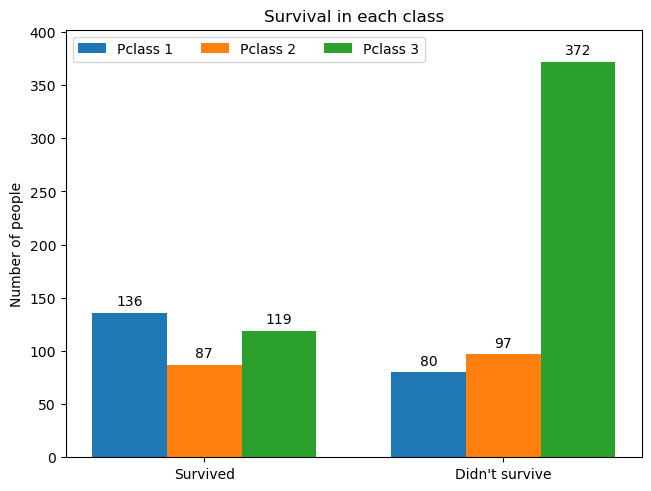

In [12]:
# Pclass vs. survival

import matplotlib.pyplot as plt

x = train_data["Pclass"][train_data.Survived == 0].value_counts().sort_index()
pclass1_n = x.values[0]
pclass2_n = x.values[1]
pclass3_n = x.values[2]

z = train_data["Pclass"][train_data.Survived == 1].value_counts().sort_index()
pclass1_y = z.values[0]
pclass2_y = z.values[1]
pclass3_y = z.values[2]

max_value = max(x.values[0], x.values[1], x.values[2], x.values[0], x.values[1], x.values[2])

# plotting the data above

categories = ("Survived", "Didn't survive")
classes = {
    'Pclass 1': (pclass1_y, pclass1_n),
    'Pclass 2': (pclass2_y, pclass2_n),
    'Pclass 3': (pclass3_y, pclass3_n),
}

x = np.arange(len(categories))  # the label locations 
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in classes.items():   # attribute: labels, measurement: the values themselves
    offset = width * multiplier   
    rects = ax.bar(x + offset, measurement, width, label=attribute)  
    ax.bar_label(rects, padding=3) 
    multiplier += 1  

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of people')
ax.set_title('Survival in each class')
ax.set_xticks(x + width, categories)   
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max_value + 30)
plt.show()

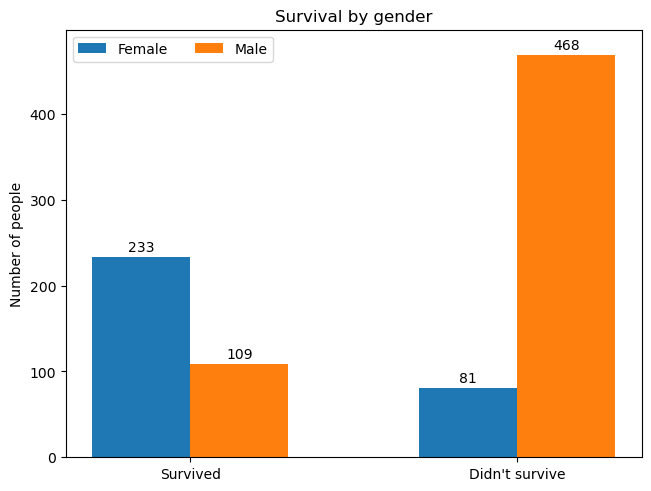

In [13]:
# Sex vs. survival

import matplotlib.pyplot as plt

x = train_data["Sex"][train_data.Survived == 0].value_counts().sort_index()
f_not_survived = x.values[0]
m_not_survived = x.values[1]

z = train_data["Sex"][train_data.Survived == 1].value_counts().sort_index()
f_survived = z.values[0]
m_survived = z.values[1]

max_value = max(f_not_survived, m_not_survived, f_survived, m_survived)

# plotting the data above

categories = ("Survived", "Didn't survive")
classes = {
    'Female': (f_survived, f_not_survived),
    'Male': (m_survived, m_not_survived),
}

x = np.arange(len(categories))  # the label locations 
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in classes.items():   # attribute: labels, measurement: the values themselves
    offset = width * multiplier   
    rects = ax.bar(x + offset, measurement, width, label=attribute)  
    ax.bar_label(rects, padding=2) 
    multiplier += 1  

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of people')
ax.set_title('Survival by gender')
ax.set_xticks(x + width/2, categories)   
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max_value + 30)
plt.show()

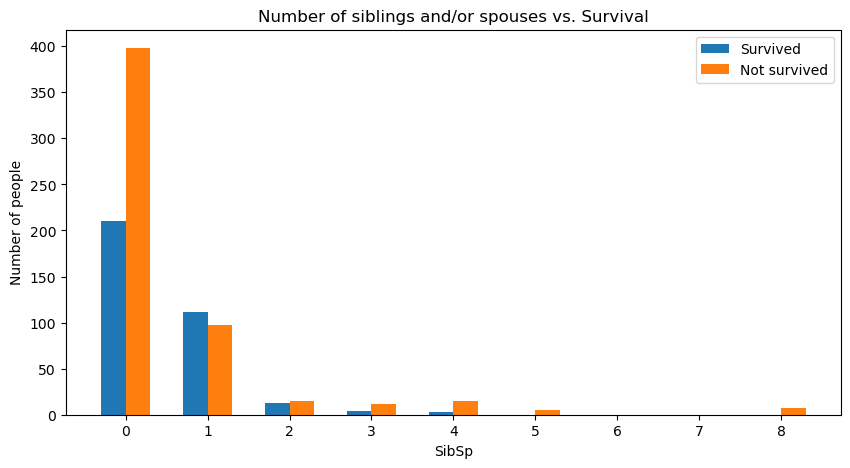

In [14]:
# SibSp vs. Survival

from collections import Counter

num_people_survived = Counter(train_data["SibSp"][train_data.Survived == 1])
num_people_n_survived = Counter(train_data["SibSp"][train_data.Survived == 0])
to_dict = dict(sorted(num_people_survived.items()))   # converting Counter to dictionary data type
to_dict_1 = dict(sorted(num_people_n_survived.items()))

N = 9  # number of bars

def complete_dict(my_dict, begin_at=0, stops_at=N):  
    for key in range(begin_at, stops_at): 
        if key not in my_dict.keys():
            my_dict[key] = 0
    return my_dict

zeros = complete_dict(to_dict_1)
sorted_dict = dict(sorted(zeros.items()))
#print(sorted_dict)

zeros_ = complete_dict(to_dict)
sorted_dict_ = dict(sorted(zeros_.items()))
#print(sorted_dict_)

survived = sorted_dict_.values()
didnt_survive = sorted_dict.values()

# Position of bars on x-axis
ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       

# Plotting
plt.bar(ind, survived , width, label='Survived')
plt.bar(ind + width, didnt_survive, width, label='Not survived')

plt.xlabel('SibSp')
plt.ylabel('Number of people')
plt.title('Number of siblings and/or spouses vs. Survival')

# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, (i for i in range(N)))

plt.legend(loc='best')   # best place to place the legend

# We can see that most people who travelled on the titanic didn't have siblings or spouses and most of them (about 2/3) didn't survive...
# If the value of SibSp >= 1, it's 50/50 chance.

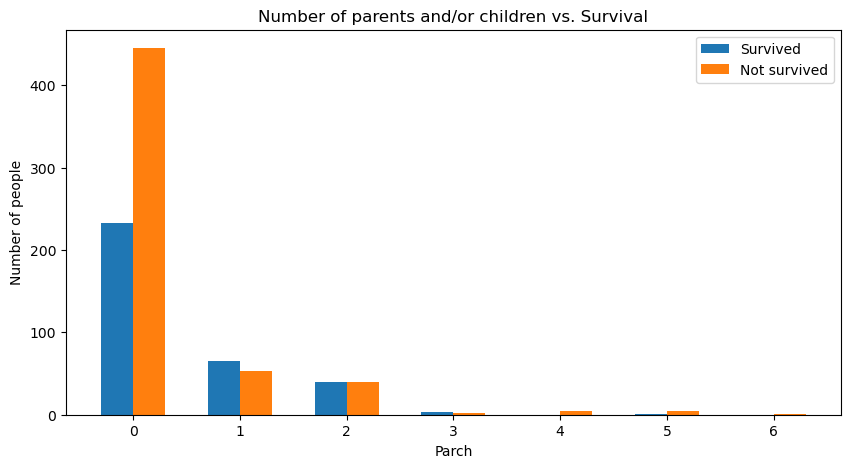

In [15]:
# Parch vs. Survival

from collections import Counter

num_people_survived = Counter(train_data["Parch"][train_data.Survived == 1])
num_people_n_survived = Counter(train_data["Parch"][train_data.Survived == 0])
to_dict = dict(sorted(num_people_survived.items()))   # converting Counter to dictionary data type
to_dict_1 = dict(sorted(num_people_n_survived.items()))

N = 7  # number of bars

def complete_dict(my_dict, begin_at=0, stops_at=N):  
    for key in range(begin_at, stops_at): 
        if key not in my_dict.keys():
            my_dict[key] = 0
    return my_dict

zeros = complete_dict(to_dict_1)
sorted_dict = dict(sorted(zeros.items()))
#print(sorted_dict)

zeros_ = complete_dict(to_dict)
sorted_dict_ = dict(sorted(zeros_.items()))
#print(sorted_dict_)

survived = sorted_dict_.values()
didnt_survive = sorted_dict.values()

# Position of bars on x-axis
ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       

# Plotting
plt.bar(ind, survived, width, label='Survived')
plt.bar(ind + width, didnt_survive, width, label='Not survived')

plt.xlabel('Parch')
plt.ylabel('Number of people')
plt.title('Number of parents and/or children vs. Survival')

# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, (i for i in range(N)))

plt.legend(loc='best') 

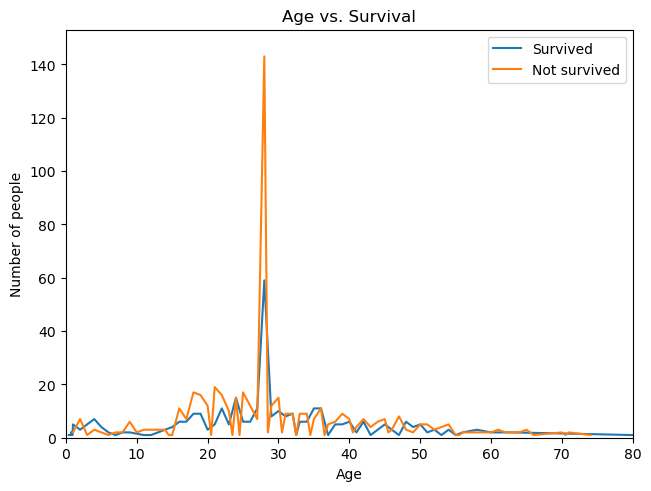

<Figure size 1600x600 with 0 Axes>

In [16]:
# Age vs. Survival 

num_people_survived = Counter(train_data["Age"][train_data.Survived == 1])
num_people_n_survived = Counter(train_data["Age"][train_data.Survived == 0])
to_dict = dict(sorted(num_people_survived.items()))   # converting Counter to dictionary data type
to_dict_1 = dict(sorted(num_people_n_survived.items()))

# finding the maximum value in a dictionary
max_value = max(to_dict.values())
max_value_1 = max(to_dict_1.values())
maximum = max(max_value, max_value_1)

fig, ax = plt.subplots(layout='constrained')
plt.figure(figsize=(16,6))
ax.set_title("Age vs. Survival")
ax.set_xlabel("Age")
ax.set_ylabel("Number of people")
ax.set_xlim((0,80))  
ax.set_ylim(0,maximum+10)

ax.plot(to_dict.keys(), to_dict.values(), label="Survived") 
ax.plot(to_dict_1.keys(), to_dict_1.values(), label="Not survived") 
ax.legend(loc="upper right")  
plt.show()

In [17]:
# Hyperparameter tuning with grid search
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [50, 100, 150, 200, 250], 'max_features': [2,4,6,8], 'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [1, 5, 10, 15, 20]}   # minimum number of leafs required to split an internal node.
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)

In [18]:
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)   # the best_estimator_ overfits the dataset

cvres = grid_search.cv_results_

# printing out the score of every single combination in grid search
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
 #   print(np.sqrt(-mean_score), params)

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100}
RandomForestClassifier(max_depth=4, max_features=4)


In [19]:
# 77.99% accuracy with random_state=10, highest accuracy without a random_state: 78.468% 
model = RandomForestClassifier(max_depth=4, max_features=2, min_samples_leaf=3, n_estimators=100, random_state=10)   # random_state for reproducible results
model.fit(X, y)  

predictions_train = model.predict(X) 
predictions = model.predict(X_test)

# checking the accuracy on the training set of the random forest model
counter = 0
for i in range(len(train_data)):
    if train_data["Survived"][i] == predictions_train[i]:
        counter += 1

accuracy = counter / len(train_data)

print("The prediction is %.2f%% accurate on the training set." % (accuracy*100))

# Exporting the predictions of the training data to a csv file
#output_train = pd.DataFrame({"PassengerId": train_data.PassengerId, "Survived": predictions_train})
#output_train.to_csv("train_result.csv", index=False)

# Writing the prediction result to a csv file (the previous csv file has to be closed, otherwise there will be an error)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})  # We only want two columns: PassengerID and Survived
output.to_csv('submission.csv', index=False) 
print("Your submission was successfully saved!")

The prediction is 82.83% accurate on the training set.
Your submission was successfully saved!


[[492  96]
 [ 57 246]]
0    549
1    342
Name: Survived, dtype: int64


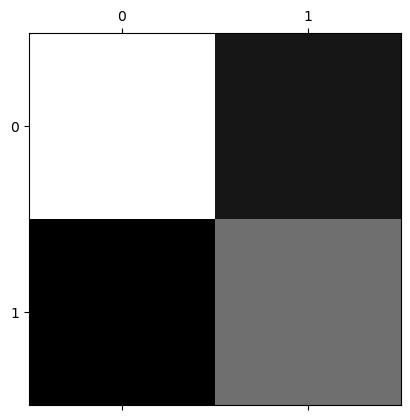

In [20]:
# Visualizing the accuracy with a confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix

true_values = train_data["Survived"].to_numpy()
plot_confusion_matrix = confusion_matrix(predictions_train, true_values)
print(plot_confusion_matrix)

print(train_data["Survived"].value_counts())

plt.matshow(plot_confusion_matrix, cmap=plt.cm.gray)

# Note: in the training data, very few samples get classified incorrectly

# Precision: TP / (TP + FP) = 246 / (246+96) = 71.9% -> credibility of a claim that a passenger survived
# Recall: TP / (TP + FN) = 246 / (246+57) = 81.2% -> the ability to detect which passengers survived

[[0.83673469 0.16326531]
 [0.18811881 0.81188119]]


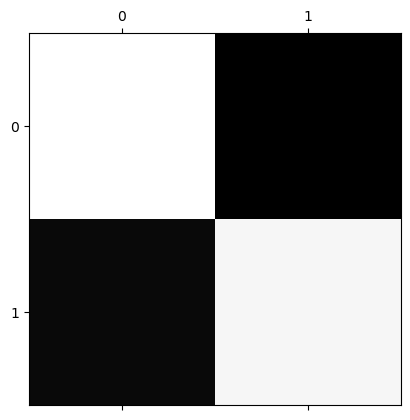

In [21]:
# Normalizing the values above by dividing each value in the confusion matrix by the number of passengers in each class

sums = plot_confusion_matrix.sum(axis=1, keepdims=True)
normalized = plot_confusion_matrix / sums
print(normalized)

plt.matshow(normalized, cmap=plt.cm.gray)

# With the normalized confusion matrix, we see that the model classifies most passengers into the correct category.

In [22]:
# using random thresholds for each feature rather than searching for the best possible thresholds (like decision trees)
from sklearn.ensemble import ExtraTreesClassifier

#extratrees = ExtraTreesClassifier(random_state=42)
extratrees = ExtraTreesClassifier(max_depth=5, max_features=2, n_estimators=150, random_state=10)   # random_state for reproducible results
extratrees.fit(X, y)  

extratrees_train = extratrees.predict(X) 
extratrees_test = extratrees.predict(X_test)

# checking the accuracy on the training set of the random forest model
counter = 0
for i in range(len(train_data)):
    if train_data["Survived"][i] == extratrees_train[i]:
        counter += 1

accuracy = counter / len(train_data)

print("The prediction is %.2f%% accurate on the training set." % (accuracy*100))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})  # We only want two columns: PassengerID and Survived
output.to_csv('submission_extratrees.csv', index=False) 
print("Your submission was successfully saved!")

The prediction is 82.04% accurate on the training set.
Your submission was successfully saved!


In [23]:
# 78.229% accurate with the test set
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(max_depth=4, max_features=2, min_samples_leaf=3, n_estimators=100, random_state=10)   # random_state for reproducible results 

estimators = [("forest", forest), ("extratrees", extratrees)]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(max_iter=10000))

clf.fit(X,y)
stacking_predict = clf.predict(X)
stacking_test = clf.predict(X_test)

for model in (forest, extratrees, clf):
    model.fit(X,y)
    prediction_train = model.predict(X)
    prediction_test = model.predict(X_test) 
    print(model.__class__.__name__, accuracy_score(y, prediction_train))
    
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': stacking_test})  
output.to_csv('submission_stacking.csv', index=False) 
print("Your submission was successfully saved!")

RandomForestClassifier 0.8282828282828283
ExtraTreesClassifier 0.8204264870931538
StackingClassifier 0.8260381593714927
Your submission was successfully saved!
